# Plot Results

This example operates on result data that was retrieved from the checkpoints that haven been trained using the minigrid.yaml config.

## Imports

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Results

In [18]:
results = pickle.load(open("./results.res", "rb"))

Shape: (Checkpoints, Seeds, Workers)

In [19]:
results.shape

(17, 2, 16)

Available data for each episode

In [20]:
[*results[0,0,0]]

['reward', 'length', 'full_reward', 'seed']

## Process Data

At first, dropp the dictionary structure and the seeds

In [21]:
target = np.zeros(results.shape + (2, ))

for checkpoint in range(results.shape[0]):
    for seed in range(results.shape[1]):
        for worker in range(results.shape[2]):
            target[checkpoint][seed][worker][0] = results[checkpoint][seed][worker]["reward"]
            target[checkpoint][seed][worker][1] = results[checkpoint][seed][worker]["length"]

New Shape: (Checkpoints, Seeds, Workers, Reward & Length Values)

In [22]:
target.shape

(17, 2, 16, 2)

Store seeds

In [23]:
seeds = []
for j in range(results.shape[1]):
    seeds.append(results[0][j][0]["seed"])
seeds

[1001, 1002]

## Plot Performance on each Seed

Compute mean and std for each seed.

In [24]:
seed_results = np.zeros((target.shape[0], target.shape[1], 4))
for checkpoint in range(target.shape[0]):
    for seed in range(target.shape[1]):
        seed_results[checkpoint][seed][0] = np.mean(target[checkpoint, seed, :, 0]) # Reward Mean
        seed_results[checkpoint][seed][1] = np.std(target[checkpoint, seed, :, 0])  # Reward std
        seed_results[checkpoint][seed][2] = np.mean(target[checkpoint, seed, :, 1]) # Length Mean
        seed_results[checkpoint][seed][3] = np.std(target[checkpoint, seed, :, 1])  # Length std

In [25]:
# Mean reward on the last checkpoint for seed 1001
seed_results[16][0][0]

3961.903746117372

Plot Mean Reward for each Seed

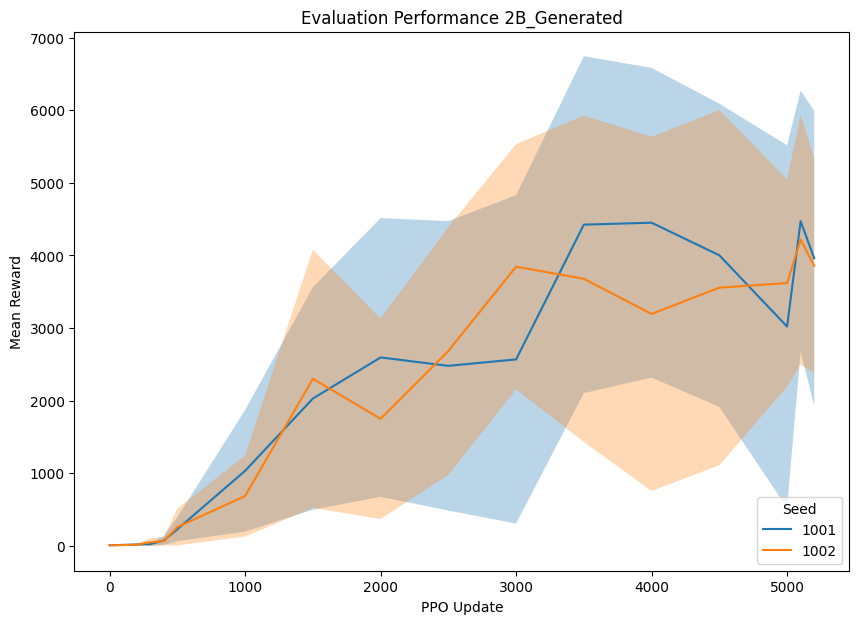

In [28]:
x = np.arange(0, results.shape[0] * 5, 5)
#hardcoded proper x
x = np.array([0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5100, 5200])
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

for i in range(results.shape[1]):
    ax.plot(x, seed_results[:, i, 0], label=seeds[i])                                                                   # mean reward
    ax.fill_between(x, seed_results[:, i, 0] + seed_results[:, i, 1], seed_results[:, i, 0] - seed_results[:, i, 1], alpha=0.3)    # std
legend = ax.legend(title="Seed", loc="lower right")
ax.set_ylabel("Mean Reward")
ax.set_xlabel("PPO Update")
ax.set_title("Evaluation Performance 2B_Generated")
plt.show()

Plot episode length

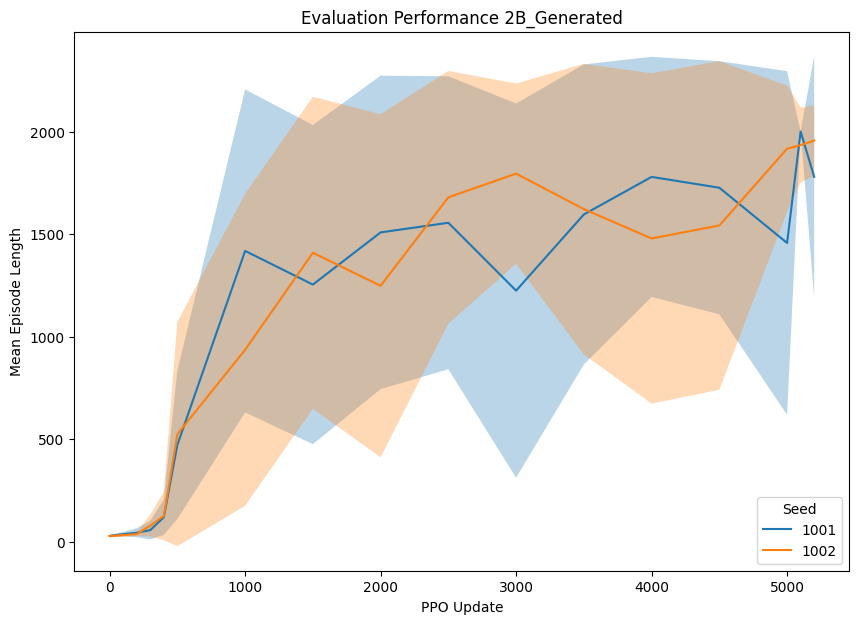

In [32]:
x = np.arange(0, results.shape[0] * 5, 5)
#hardcoded proper x
x = np.array([0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5100, 5200])
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

for i in range(results.shape[1]):
    ax.plot(x, seed_results[:, i, 2], label=seeds[i])                                                                               # mean episode length
    ax.fill_between(x, seed_results[:, i, 2] + seed_results[:, i, 3], seed_results[:, i, 2] - seed_results[:, i, 3], alpha=0.3)     # std
legend = ax.legend(title="Seed", loc="lower right")
ax.set_ylabel("Mean Episode Length")
ax.set_xlabel("PPO Update")
ax.set_title("Evaluation Performance 2B_Generated")
plt.show()

## Plot overall Performance

In [30]:
overall_results = np.zeros((target.shape[0], 4))
for checkpoint in range(target.shape[0]):
    overall_results[checkpoint][0] = np.mean(target[checkpoint, :, :, 0].flatten()) # Reward Mean
    overall_results[checkpoint][1] = np.std(target[checkpoint, :, :, 0]).flatten()  # Reward std
    overall_results[checkpoint][2] = np.mean(target[checkpoint, :, :, 1]).flatten() # Length Mean
    overall_results[checkpoint][3] = np.std(target[checkpoint, :, :, 1]).flatten()  # Length std

Plot mean reward

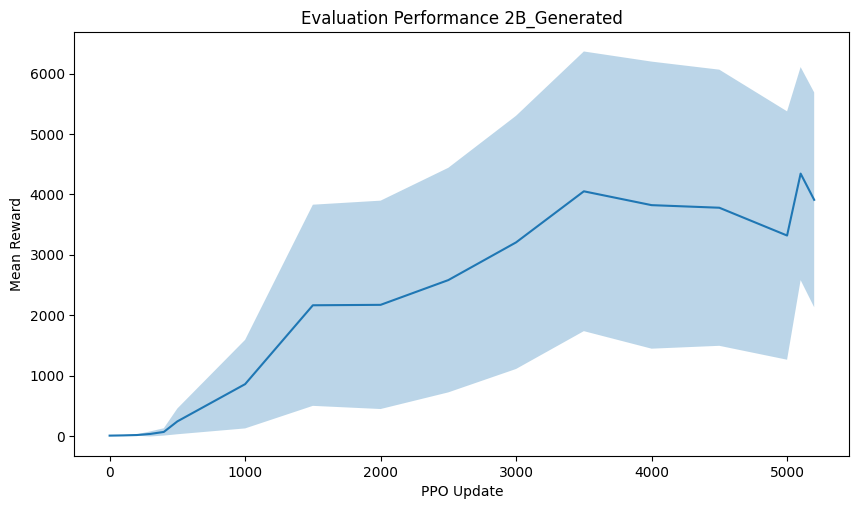

In [33]:
x = np.arange(0, results.shape[0] * 5, 5)
#hardcoded proper x
x = np.array([0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5100, 5200])
fig, ax = plt.subplots()
fig.set_size_inches(10, 5.5)

ax.plot(x, overall_results[:, 0], label="Overall Performance")                                                                 # mean reward
ax.fill_between(x, overall_results[:, 0] + overall_results[:, 1], overall_results[:, 0] - overall_results[:, 1], alpha=0.3)    # std
ax.set_ylabel("Mean Reward")
ax.set_xlabel("PPO Update")
ax.set_title("Evaluation Performance 2B_Generated")
plt.show()

Plot mean episode length

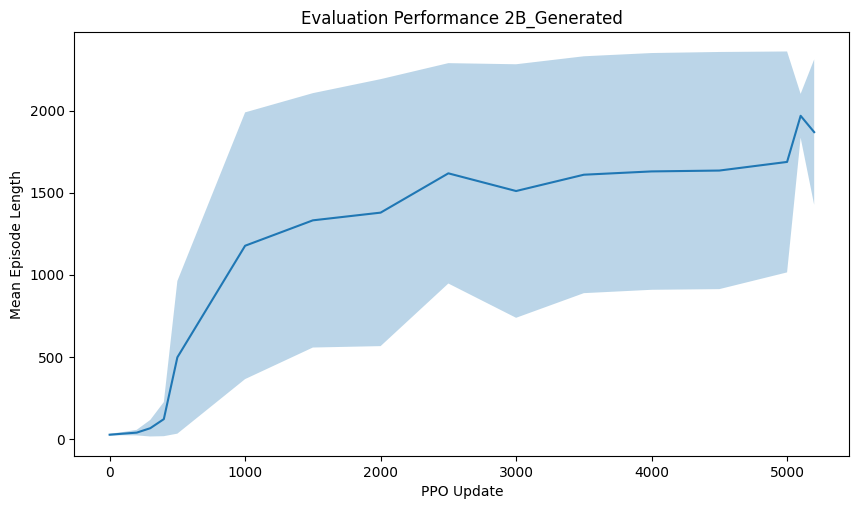

In [34]:
x = np.arange(0, results.shape[0] * 5, 5)
#hardcoded proper x
x = np.array([0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5100, 5200])
fig, ax = plt.subplots()
fig.set_size_inches(10, 5.5)

ax.plot(x, overall_results[:, 2], label="Overall Performance")                                                                 # mean episode length
ax.fill_between(x, overall_results[:, 2] + overall_results[:, 3], overall_results[:, 2] - overall_results[:, 3], alpha=0.3)    # std
ax.set_ylabel("Mean Episode Length")
ax.set_xlabel("PPO Update")
ax.set_title("Evaluation Performance 2B_Generated")
plt.show()